In [6]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Load embeddings from file
embeddings_file = '../data/embeddings.pkl'
with open(embeddings_file, 'rb') as f:
    embeddings = pickle.load(f)

# Define custom distance function
def custom_distance(embedding1: np.ndarray, embedding2: np.ndarray, alpha: float) -> float:
    page_num1, emb1 = int(embedding1[0]), embedding1[1:]
    page_num2, emb2 = int(embedding2[0]), embedding2[1:]
    embedding_distance = np.linalg.norm(emb1 - emb2)
    page_distance = abs(page_num1 - page_num2)
    return float(alpha * embedding_distance + (1 - alpha) * page_distance)

## Plotting only embedding distances. alpha=1.0

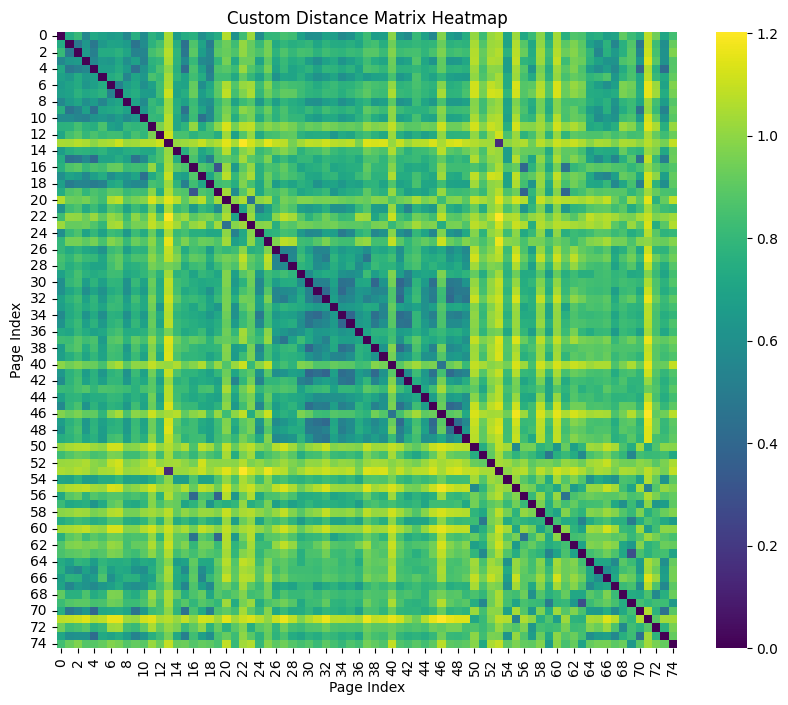

In [8]:
# Compute the custom distance matrix
page_numbers = np.arange(len(embeddings)).reshape(-1, 1)
embeddings_with_pages = np.hstack((page_numbers, np.array(embeddings)))
distance_matrix = squareform(pdist(embeddings_with_pages, lambda x, y: custom_distance(x, y, alpha=1.0)))

# Visualize the distance matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap='viridis')
plt.title('Custom Distance Matrix Heatmap')
plt.xlabel('Page Index')
plt.ylabel('Page Index')
plt.show()

### alpha = 0.9

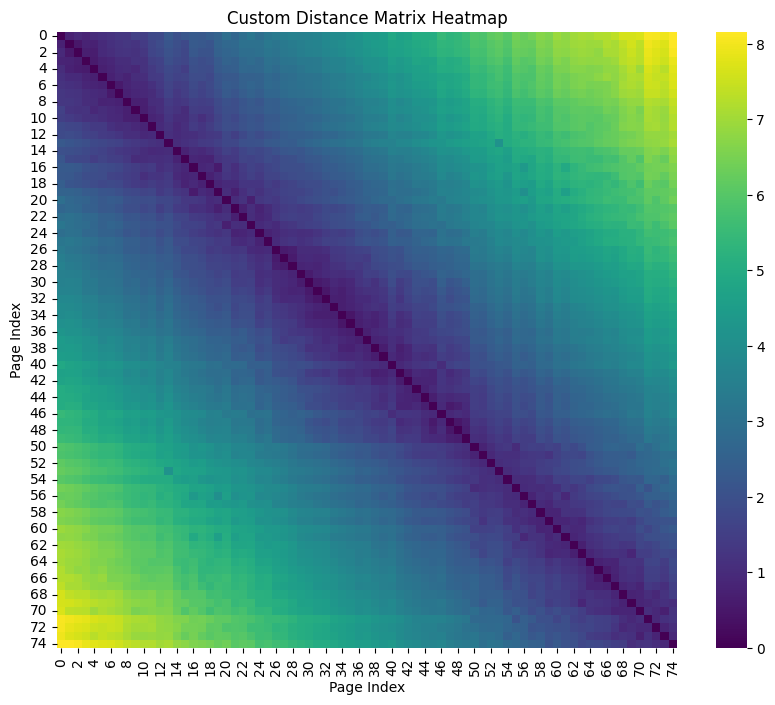

In [10]:
# Compute the custom distance matrix
page_numbers = np.arange(len(embeddings)).reshape(-1, 1)
embeddings_with_pages = np.hstack((page_numbers, np.array(embeddings)))
distance_matrix = squareform(pdist(embeddings_with_pages, lambda x, y: custom_distance(x, y, alpha=0.9)))

# Visualize the distance matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap='viridis')
plt.title('Custom Distance Matrix Heatmap')
plt.xlabel('Page Index')
plt.ylabel('Page Index')
plt.show()

## Visualising Clusters

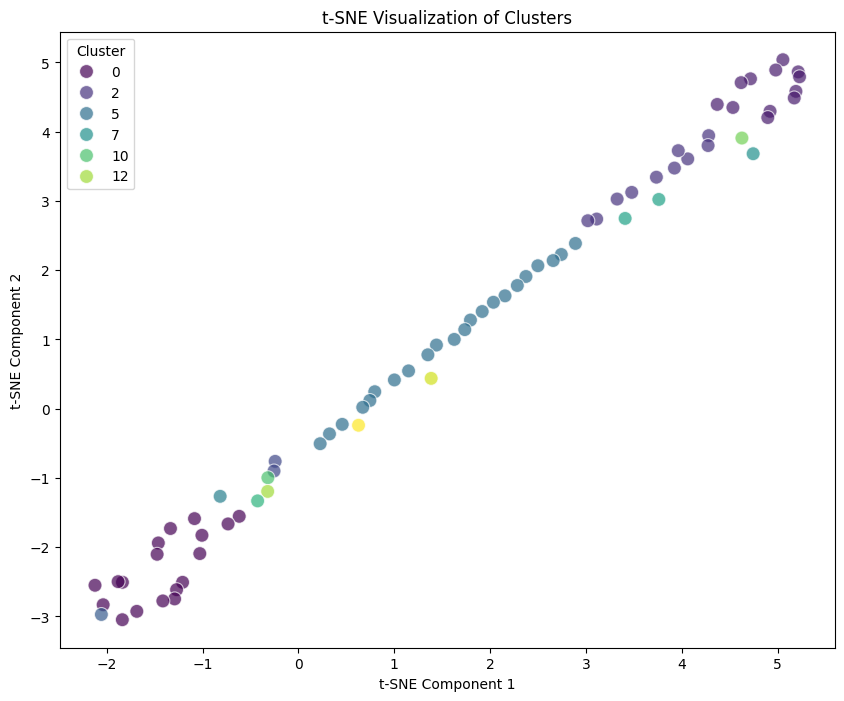

In [14]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

page_numbers = np.arange(len(embeddings)).reshape(-1, 1)
embeddings_with_pages = np.hstack((page_numbers, np.array(embeddings)))
distance_matrix = squareform(pdist(embeddings_with_pages, lambda x, y: custom_distance(x, y, alpha=0.9)))

# Perform clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.9, metric='precomputed', linkage='single')
labels = clustering.fit_predict(distance_matrix)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=42)
embeddings_2d = tsne.fit_transform(distance_matrix)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()